In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


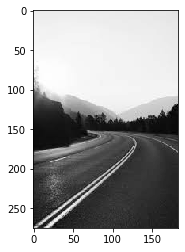

In [5]:
DATADIR = "C:\\Users\\udbha\\Downloads\\EAS(Optional)\\train"
CATEGORIES = ["smooth", "rough"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to smooth or rough dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break    

In [6]:
print(img_array)

[[235 235 235 ... 227 227 227]
 [235 235 235 ... 227 227 227]
 [235 235 235 ... 227 227 227]
 ...
 [ 50 101 122 ...  27  27  26]
 [ 77 140 171 ...  27  27  26]
 [142 192 197 ...  27  27  26]]


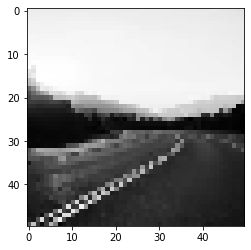

In [7]:
#NORMALIZE
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = "gray")
plt.show()

In [8]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to smooth or rough dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append([new_array, class_num])
        
create_training_data()        


In [9]:
print(len(training_data))

150


In [10]:
import random
random.shuffle(training_data)

In [11]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
1
0
1
0
1
0


In [12]:
X = []
y = []

In [13]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,IMG_SIZE, IMG_SIZE, 1)    
    

In [14]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [15]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [16]:
X[1]

array([[[56],
        [64],
        [60],
        ...,
        [50],
        [48],
        [47]],

       [[42],
        [60],
        [63],
        ...,
        [62],
        [55],
        [52]],

       [[39],
        [40],
        [44],
        ...,
        [60],
        [57],
        [54]],

       ...,

       [[39],
        [36],
        [49],
        ...,
        [40],
        [43],
        [46]],

       [[35],
        [38],
        [56],
        ...,
        [44],
        [54],
        [38]],

       [[37],
        [33],
        [50],
        ...,
        [44],
        [54],
        [57]]], dtype=uint8)

In [17]:
train  = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [18]:
train_dataset = train.flow_from_directory("C:\\Users\\udbha\\Downloads\\Minor Project\\train", target_size = (200,200), batch_size = 3, class_mode = 'binary')
validation_dataset = train.flow_from_directory("C:\\Users\\udbha\\Downloads\\Minor Project\\validation", target_size = (200,200), batch_size = 3, class_mode = 'binary')

Found 150 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [19]:
train_dataset.class_indices

{'rough': 0, 'smooth': 1}

In [20]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (200,200,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ## 
                                   tf.keras.layers.Dense(512, activation = 'relu'), 
                                   ##
                                   tf.keras.layers.Dense(1, activation = 'sigmoid')
                                ])



In [21]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['accuracy'])

C:\Users\udbha\Anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [22]:
model_fit = model.fit(train_dataset, steps_per_epoch = 3, epochs = 30,
                     validation_data= validation_dataset)

Epoch 1/30
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
3/3 [==============================] - ETA: 0s - loss: 1.7723 - accuracy: 0.6667WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000224BAC7E678> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

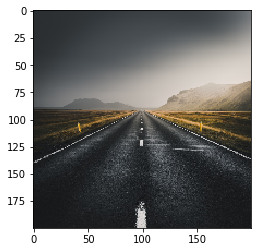

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
WHEELED MOTION


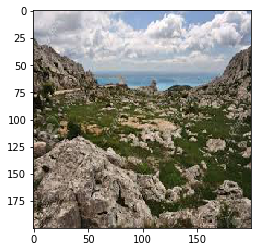

LEGGED MOTION


In [23]:
dir_path = 'C:\\Users\\udbha\\Downloads\\EAS(Optional)\\test' 

for i in os.listdir(dir_path):
    img = image.load_img(dir_path + '//' + i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("LEGGED MOTION")
    else: 
        print("WHEELED MOTION")
    